In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all.csv to all.csv


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# خواندن فایل CSV
df = pd.read_csv('all.csv')

# پاک‌سازی اعداد (حذف کاما) و تبدیل به float
df['Ndvi'] = df['Ndvi'].str.replace(',', '').astype(float)
df['LST'] = df['LST  '].astype(float)
df['Pm'] = pd.to_numeric(df['Pm'], errors='coerce')

# استفاده از تاریخ در ستون اول به عنوان اندیس زمانی
df['Date'] = pd.to_datetime(df['TS'], dayfirst=True)
df.set_index('Date', inplace=True)

# حذف ستون‌های اضافی
df = df[['Evaporation', 'Precipitation', 'Ndvi', 'LST', 'Pm']]

# حذف مقادیر گمشده
df.dropna(inplace=True)

# نمایش داده‌ها
print(df.head())

            Evaporation  Precipitation      Ndvi     LST      Pm
Date                                                            
2001-02-01       36.022          0.153  62489.16  10.886   7.008
2001-03-01       90.923         19.554  62490.52   6.823   6.281
2001-04-01      128.464          3.369  62490.96   4.034   6.699
2001-05-01      173.359          0.065  62490.05   4.811   8.280
2001-07-01      217.899          1.530  62487.89  -2.518  14.183


<ipython-input-3-27f435e3b7a2>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['TS'], dayfirst=True)


In [ ]:
# تابع برای تست گرنجر بین دو متغیر
def run_granger_tests(df, x, y, max_lag=12):
    print(f'\n\n***** Granger Causality Test: {x} causes {y} *****')
    result = grangercausalitytests(df[[y, x]], maxlag=max_lag, verbose=True)

# مثال: آیا 'Evaporation' باعث تغییرات در 'Pm' می‌شود؟
run_granger_tests(df, 'Evaporation', 'Pm', max_lag=6)

# مثال دوم: آیا 'Ndvi' باعث 'LST' می‌شود؟
run_granger_tests(df, 'Ndvi', 'LST', max_lag=6)



***** Granger Causality Test: Evaporation causes Pm *****

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8971  , p=0.3450  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.9139  , p=0.3391  , df=1
likelihood ratio test: chi2=0.9113  , p=0.3398  , df=1
parameter F test:         F=0.8971  , p=0.3450  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8311  , p=0.1636  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=3.7781  , p=0.1512  , df=2
likelihood ratio test: chi2=3.7350  , p=0.1545  , df=2
parameter F test:         F=1.8311  , p=0.1636  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2665  , p=0.2879  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=3.9712  , p=0.2646  , df=3
likelihood ratio test: chi2=3.9233  , p=0.2699  , df=3
parameter F test:         F=1.2665  , p=0.2879  , df_denom=155, df_num=3

Granger Causality
number of lags 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
variables = df.columns
max_lag = 6

results = []

for x in variables:
    for y in variables:
        if x != y:
            print(f"\nTesting: Does {x} Granger-cause {y}?")
            test_result = grangercausalitytests(df[[y, x]], maxlag=max_lag, verbose=False)
            for lag in range(1, max_lag+1):
                p_value = test_result[lag][0]['ssr_ftest'][1]
                results.append({'Cause': x, 'Effect': y, 'Lag': lag, 'p-value': p_value})

# تبدیل نتایج به DataFrame و فیلتر p-value کمتر از 0.05
result_df = pd.DataFrame(results)
significant = result_df[result_df['p-value'] < 0.05]

# نمایش نتایج معنادار
print("\nSignificant Granger Causality Relationships (p < 0.05):")
print(significant.sort_values(by='p-value'))


Testing: Does Evaporation Granger-cause Precipitation?

Testing: Does Evaporation Granger-cause Ndvi?

Testing: Does Evaporation Granger-cause LST?

Testing: Does Evaporation Granger-cause Pm?

Testing: Does Precipitation Granger-cause Evaporation?

Testing: Does Precipitation Granger-cause Ndvi?

Testing: Does Precipitation Granger-cause LST?

Testing: Does Precipitation Granger-cause Pm?

Testing: Does Ndvi Granger-cause Evaporation?

Testing: Does Ndvi Granger-cause Precipitation?

Testing: Does Ndvi Granger-cause LST?

Testing: Does Ndvi Granger-cause Pm?


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul


Testing: Does LST Granger-cause Evaporation?

Testing: Does LST Granger-cause Precipitation?

Testing: Does LST Granger-cause Ndvi?

Testing: Does LST Granger-cause Pm?

Testing: Does Pm Granger-cause Evaporation?

Testing: Does Pm Granger-cause Precipitation?

Testing: Does Pm Granger-cause Ndvi?

Testing: Does Pm Granger-cause LST?

Significant Granger Causality Relationships (p < 0.05):
    Cause         Effect  Lag   p-value
83    LST  Precipitation    6  0.001854
78    LST  Precipitation    1  0.009066
119    Pm            LST    6  0.011524
75    LST    Evaporation    4  0.012820
76    LST    Evaporation    5  0.013391
77    LST    Evaporation    6  0.015261
116    Pm            LST    3  0.017381
117    Pm            LST    4  0.017919
104    Pm  Precipitation    3  0.025278
82    LST  Precipitation    5  0.025684
109    Pm           Ndvi    2  0.029264
79    LST  Precipitation    2  0.033662
74    LST    Evaporation    3  0.034648
110    Pm           Ndvi    3  0.039394
103   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

In [ ]:

from google.colab import files
files.download('granger_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

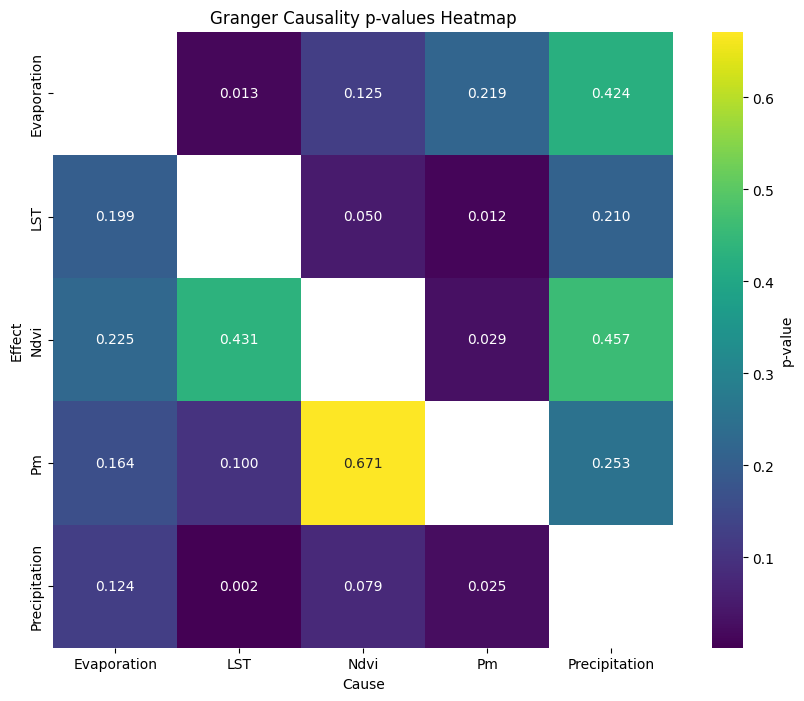

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ساخت ماتریس از کمترین p-value بین هر دو متغیر
pivot_df = result_df.pivot_table(index='Effect', columns='Cause', values='p-value', aggfunc='min')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap='viridis', cbar_kws={'label': 'p-value'})
plt.title('Granger Causality p-values Heatmap')
plt.xlabel('Cause')
plt.ylabel('Effect')
plt.show()

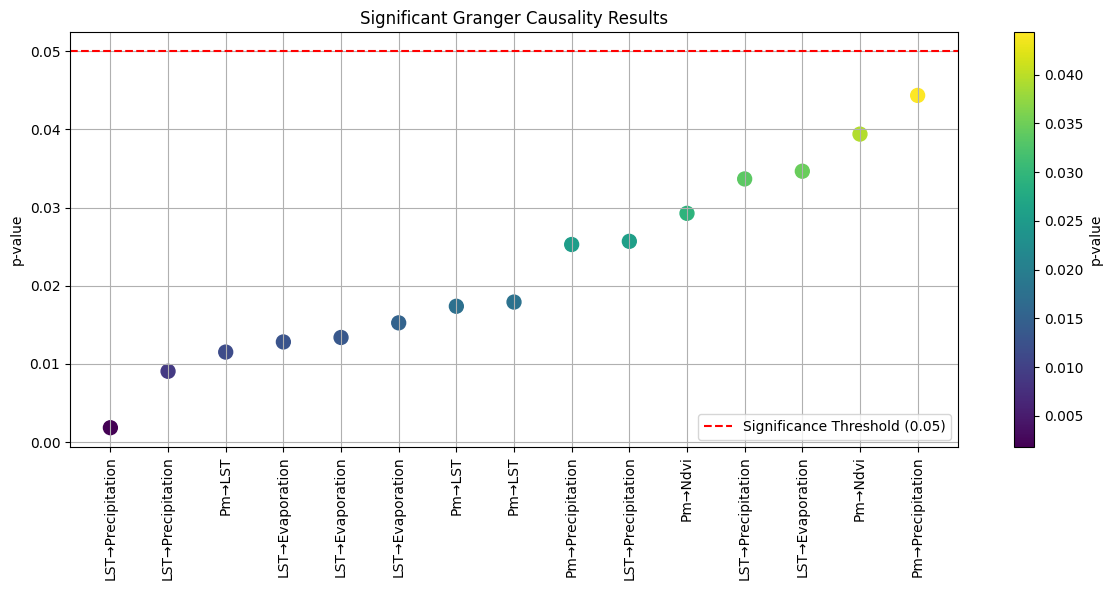

In [ ]:
significant_sorted = significant.sort_values(by='p-value')

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=range(len(significant_sorted)),
    y=significant_sorted['p-value'],
    c=significant_sorted['p-value'],
    cmap='viridis',
    s=100
)
plt.colorbar(scatter, label='p-value')
plt.xticks(range(len(significant_sorted)),
           [f"{row['Cause']}→{row['Effect']}" for _, row in significant_sorted.iterrows()],
           rotation=90)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('Significant Granger Causality Results')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()